<a href="https://colab.research.google.com/github/Anuj-1996/Nifty-Prediction-by-ARIMA-Model/blob/main/Auto_Arimaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller as ad
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

Downloading NIFTY data from yahoo finance

In [58]:
# Defining the Ticker
ticker = yf.Ticker('^NSEI')

# Obtaining Historical Market Data
start_date = '2007-05-01'
end_date = '2022-09-09'
df= ticker.history(start=start_date, end=end_date)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,0,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,0,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0,0
...,...,...,...,...,...,...,...
2022-09-02,17598.400391,17643.849609,17476.449219,17539.449219,256300,0,0
2022-09-05,17546.449219,17683.150391,17540.349609,17665.800781,230300,0,0
2022-09-06,17695.699219,17764.650391,17587.650391,17655.599609,251200,0,0


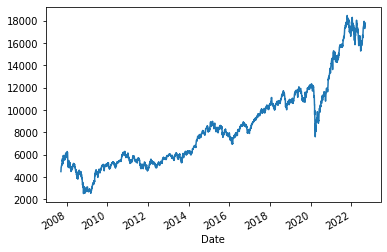

In [59]:
ts =df['Close']
ts.plot()


augmented Dickey–Fuller test (ADF) to check stationarity

In [60]:
adtest = ad(ts)
print("P value is:" ,adtest[1])

P value is: 0.9881591201198271


As the P value is not less than 0.05, means data is not stationary. We will use Auto_arima from pmdarima library to find out (p,q,d) values. First we will divide data into test and train sets.


Train and Test Data

In [61]:
#Defining test and train data sizes
train = ts[:3400]
test = ts[3400:]
train.tail()

Date
2021-08-03    16130.750000
2021-08-04    16258.799805
2021-08-05    16294.599609
2021-08-06    16238.200195
2021-08-09    16258.250000
Name: Close, dtype: float64

Auto ARIMA

In [62]:
import pmdarima
from pmdarima import auto_arima

auto_arima(train, start_P = 0,Stat_Q=0, seasonal= True, d=1, trace=True, error_action='ignore', surpass_warnigns= True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=40611.138, Time=4.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=40652.584, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=40652.601, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=40652.653, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=40655.032, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=40655.925, Time=1.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=40655.901, Time=2.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=40597.924, Time=8.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=40656.481, Time=0.79 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=40586.847, Time=10.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=40658.450, Time=0.96 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=40583.804, Time=11.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=40625.388, Time=7.42 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=40587.143, Time=12.67 sec
 ARIMA(4,1,3)(0,

ARIMA(order=(5, 1, 2), scoring_args={}, suppress_warnings=True)

In [63]:
len(ts)

3669

Build Arima


In [71]:
model = sm.tsa.arima.ARIMA(train, order=(5, 1, 2)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3400
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -20284.112
Date:                Sun, 11 Sep 2022   AIC                          40584.224
Time:                        11:24:49   BIC                          40633.274
Sample:                             0   HQIC                         40601.755
                               - 3400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3433      0.027    -49.160      0.000      -1.397      -1.290
ar.L2         -0.7613      0.028    -27.331      0.000      -0.816      -0.707
ar.L3          0.0143      0.018      0.811      0.4

In [72]:
len(train), (len(ts)-1)

(3400, 3668)

In [73]:
pred = model.predict(start=len(train), end = (len(ts)-1))
pred

3400    16253.501497
3401    16248.867702
3402    16261.577745
3403    16245.216761
3404    16258.382320
            ...     
3664    16253.425948
3665    16253.425948
3666    16253.425948
3667    16253.425948
3668    16253.425948
Name: predicted_mean, Length: 269, dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error as mse
error = np.sqrt(mse(test,pred))
print("Mean:", test.mean(), "error:", error)

Mean: 17112.45742695748 error: 1118.5818346730653


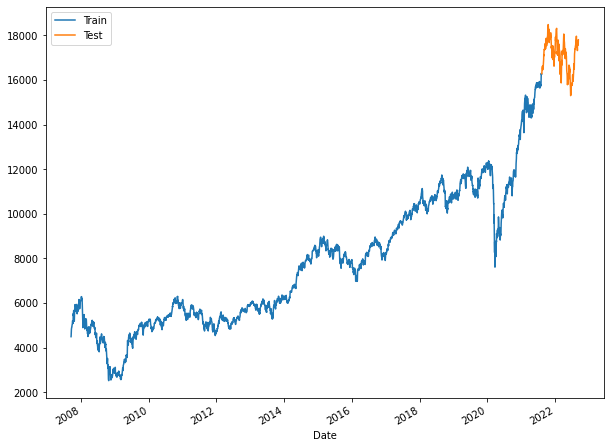

In [75]:
train.plot(legend = True, label ='Train', figsize =(10,8))
test.plot(legend = True, label ='Test')


Pedict future 4 days closing values (using whole data set)

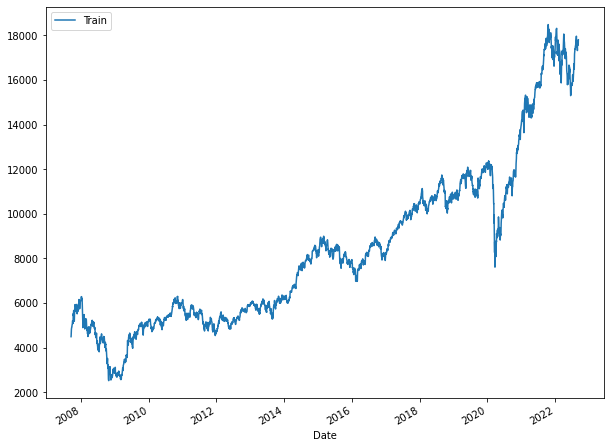

In [78]:
final_model =sm.tsa.arima.ARIMA(ts, order=(5, 1, 2)).fit()
prediction =final_model.predict(len(ts),len(ts)+4)
ts.plot(legend = True, label ='Train', figsize =(10,8))

In [81]:
print("Next 4 days closing prices:", prediction, end="\n")

Next 4 days closing prices: 3669    17846.321577
3670    17836.651586
3671    17811.966370
3672    17848.005956
3673    17821.920895
Name: predicted_mean, dtype: float64
